In [7]:
pip install pandas

In [1]:

# Step 1.1: Load Libraries and Dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('adult_with_headers.csv')



In [3]:

# Display first 5 rows
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 📊 Data Exploration

The dataset contains information such as age, education, occupation, marital status, etc., to predict whether an individual's income exceeds $50K/year.

We start by checking:
- Data types
- Null values
- Basic statistics


In [4]:
# Step 1.2: Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Step 1.3: Summary Stats
df.describe(include='all')


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [6]:
# Step 1.4: Check for missing values
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


### 🧼 Handling Missing Values

We identify missing values. In some versions of this dataset, missing entries are marked as `?`.

Let's check and handle them accordingly.


In [7]:
# Step 1.5: Replace '?' with np.nan for cleaner handling
df.replace(' ?', np.nan, inplace=True)

In [8]:
# Check again for missing values
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


In [9]:
# Drop rows with missing values
df_cleaned = df.dropna()

In [10]:
# Shape before and after cleaning
df.shape, df_cleaned.shape

((32561, 15), (30162, 15))

### 📏 Feature Scaling

We will apply:
- StandardScaler (mean=0, std=1)
- MinMaxScaler (0 to 1)

We apply these on continuous numerical columns like `age`, `hours-per-week`, etc.


In [11]:
# Step 1.6: Identify numeric columns
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [12]:
# Step 1.7: Standard Scaling
scaler_standard = StandardScaler()
standard_scaled = scaler_standard.fit_transform(df_cleaned[num_cols])
standard_scaled_df = pd.DataFrame(standard_scaled, columns=num_cols)
standard_scaled_df.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734


In [13]:
# Step 1.8: Min-Max Scaling
scaler_minmax = MinMaxScaler()
minmax_scaled = scaler_minmax.fit_transform(df_cleaned[num_cols])
minmax_scaled_df = pd.DataFrame(minmax_scaled, columns=num_cols)
minmax_scaled_df.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.043338,0.800000,0.02174,0.0,0.397959
1,0.452055,0.047277,0.800000,0.00000,0.0,0.122449
2,0.287671,0.137244,0.533333,0.00000,0.0,0.397959
3,0.493151,0.150212,0.400000,0.00000,0.0,0.397959
4,0.150685,0.220703,0.800000,0.00000,0.0,0.397959


### 📌 When to use which scaler?

- **StandardScaler** is useful when features are normally distributed (Gaussian). Algorithms like SVM and Logistic Regression perform better with this.
- **MinMaxScaler** is useful when distribution is not Gaussian or when features have a hard boundary (like pixels 0–255).


In [14]:
# Step 2.1: Identify Categorical Columns
cat_cols = df_cleaned.select_dtypes(include='object').columns
cat_cols


Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [15]:
# Step 2.2: Count unique categories in each categorical column
df_cleaned[cat_cols].nunique().sort_values()


,0
sex,2
income,2
race,5
relationship,6
workclass,7
marital_status,7
occupation,14
education,16
native_country,41


### 🎯 Encoding Strategy:

- Categorical columns with **< 5 unique values** → One-Hot Encoding
- Categorical columns with **≥ 5 unique values** → Label Encoding


In [16]:
from sklearn.preprocessing import LabelEncoder

# Step 2.3: Apply encodings
df_encoded = df_cleaned.copy()

# One-Hot Encoding
one_hot_cols = [col for col in cat_cols if df_cleaned[col].nunique() < 5]
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols)

# Label Encoding
label_cols = [col for col in cat_cols if df_cleaned[col].nunique() >= 5]
le = LabelEncoder()

for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Preview the encoded dataframe
df_encoded.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,5,77516,9,13,4,0,1,4,2174,0,40,38,False,True,True,False
1,50,4,83311,9,13,2,3,0,4,0,0,13,38,False,True,True,False
2,38,2,215646,11,9,0,5,1,4,0,0,40,38,False,True,True,False
3,53,2,234721,1,7,2,5,0,2,0,0,40,38,False,True,True,False
4,28,2,338409,9,13,2,9,5,2,0,0,40,4,True,False,True,False


### 🔍 Pros & Cons of Encoding Techniques:

#### ✅ One-Hot Encoding:
**Pros:**
- No ordinal relationship is assumed
- Works well with tree-based models

**Cons:**
- High dimensionality (sparse matrix) if many categories
- Not ideal when you have a lot of unique values

#### ✅ Label Encoding:
**Pros:**
- Simple and memory efficient
- Keeps ordinal nature (if applicable)

**Cons:**
- Can mislead models into thinking there's a ranking (e.g., category 2 > 1)

In this dataset, One-Hot Encoding was applied to features like `sex` and `income`, while Label Encoding was used for `occupation`, `native-country`, etc.


### 🛠 Feature Engineering

We'll now:
1. Create 2 new features that might help improve model performance.
2. Apply a log transformation to reduce skewness of a numerical feature.


In [17]:
df_fe = df_encoded.copy()

# 🔹 Feature 1: Age Binned (Young, Adult, Senior)
df_fe['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 30, 60, 100], labels=['Young', 'Adult', 'Senior'])

# 🔹 Feature 2: Work-Hours Category (Low, Medium, High)
df_fe['work_hours_level'] = pd.cut(df_cleaned['hours_per_week'], bins=[0, 30, 50, 100], labels=['Low', 'Medium', 'High'])

# Preview
df_fe[['age', 'age_group', 'hours_per_week', 'work_hours_level']].head()


,age,age_group,hours_per_week,work_hours_level
0,39,Adult,40,Medium
1,50,Adult,13,Low
2,38,Adult,40,Medium
3,53,Adult,40,Medium
4,28,Young,40,Medium


### ✨ Rationale:

- **`age_group`**: Different age categories may correlate with experience or income level.
- **`work_hours_level`**: People working more hours might have different income levels or job types.


In [18]:
# Check skewness
df_cleaned[['capital_gain', 'capital_loss']].skew()


,0
capital_gain,11.902682
capital_loss,4.526380


The `capital_gain` and `capital_loss` columns are often **heavily right-skewed** due to many zeros and a few large values.

We’ll apply **log(1 + x)** to normalize them.


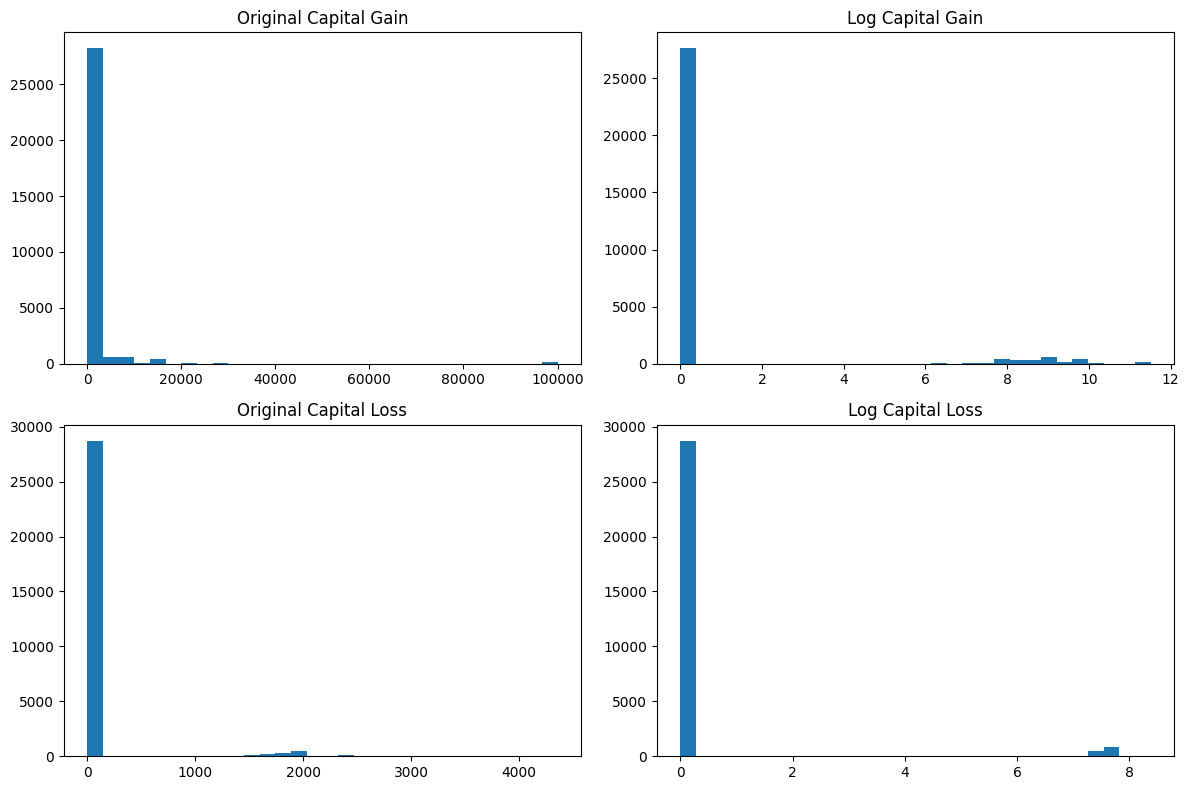

In [19]:
# Apply log transformation
df_fe['capital-gain-log'] = np.log1p(df_cleaned['capital_gain'])
df_fe['capital-loss-log'] = np.log1p(df_cleaned['capital_loss'])

# Compare distributions before and after (optional visual)
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(df_cleaned['capital_gain'], bins=30)
axs[0, 0].set_title('Original Capital Gain')

axs[0, 1].hist(df_fe['capital-gain-log'], bins=30)
axs[0, 1].set_title('Log Capital Gain')

axs[1, 0].hist(df_cleaned['capital_loss'], bins=30)
axs[1, 0].set_title('Original Capital Loss')

axs[1, 1].hist(df_fe['capital-loss-log'], bins=30)
axs[1, 1].set_title('Log Capital Loss')

plt.tight_layout()
plt.show()


#### Effect of Log Transformation:

Capital gain and capital loss are highly skewed due to many zero values and rare extreme outliers.  
Applying log(1 + x) transformation:

- Reduces skewness
- Normalizes the scale
- Improves performance in linear models
- Reduces the effect of outliers

This transformation leads to more stable and reliable machine learning models.


In [20]:
from sklearn.ensemble import IsolationForest

# Use numeric features only
numeric_features = df_fe.select_dtypes(include=['int64', 'float64']).columns

# Apply Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df_fe[numeric_features])

# Add outlier flag to dataset
df_fe['outlier'] = outliers

# Keep only non-outliers (label 1)
df_no_outliers = df_fe[df_fe['outlier'] == 1]

# Shape before and after
df_fe.shape, df_no_outliers.shape


((30162, 22), (29860, 22))

### 📌 Why Remove Outliers?

Outliers can:
- Skew the mean and standard deviation
- Reduce model accuracy
- Mislead training algorithms (especially linear models and kNN)

We used **Isolation Forest** (unsupervised) which identifies rare and different points as outliers.


In [22]:
import ppscore as pps


In [23]:
# Compute PPS matrix
pps_matrix = pps.matrix(df_no_outliers)

# Filter to only show scores for target variable 'income_ >50K' (or whatever is the correct column name)
pps_matrix[pps_matrix['y'] == 'income_ >50K'].sort_values(by='ppscore', ascending=False)


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
346,income_ <=50K,income_ >50K,1.000000e+00,classification,True,weighted F1,0.653927,1.000000,DecisionTreeClassifier()
368,income_ >50K,income_ >50K,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
434,capital-gain-log,income_ >50K,2.774034e-01,classification,True,weighted F1,0.653927,0.749929,DecisionTreeClassifier()
214,capital_gain,income_ >50K,2.774034e-01,classification,True,weighted F1,0.653927,0.749929,DecisionTreeClassifier()
82,education,income_ >50K,2.240255e-01,classification,True,weighted F1,0.653927,0.731456,DecisionTreeClassifier()
104,education_num,income_ >50K,2.240255e-01,classification,True,weighted F1,0.653927,0.731456,DecisionTreeClassifier()
456,capital-loss-log,income_ >50K,1.416491e-01,classification,True,weighted F1,0.653927,0.702948,DecisionTreeClassifier()
236,capital_loss,income_ >50K,1.404429e-01,classification,True,weighted F1,0.653927,0.702530,DecisionTreeClassifier()
38,workclass,income_ >50K,9.240500e-02,classification,True,weighted F1,0.653927,0.685906,DecisionTreeClassifier()
170,relationship,income_ >50K,1.429537e-02,classification,True,weighted F1,0.653927,0.658874,DecisionTreeClassifier()


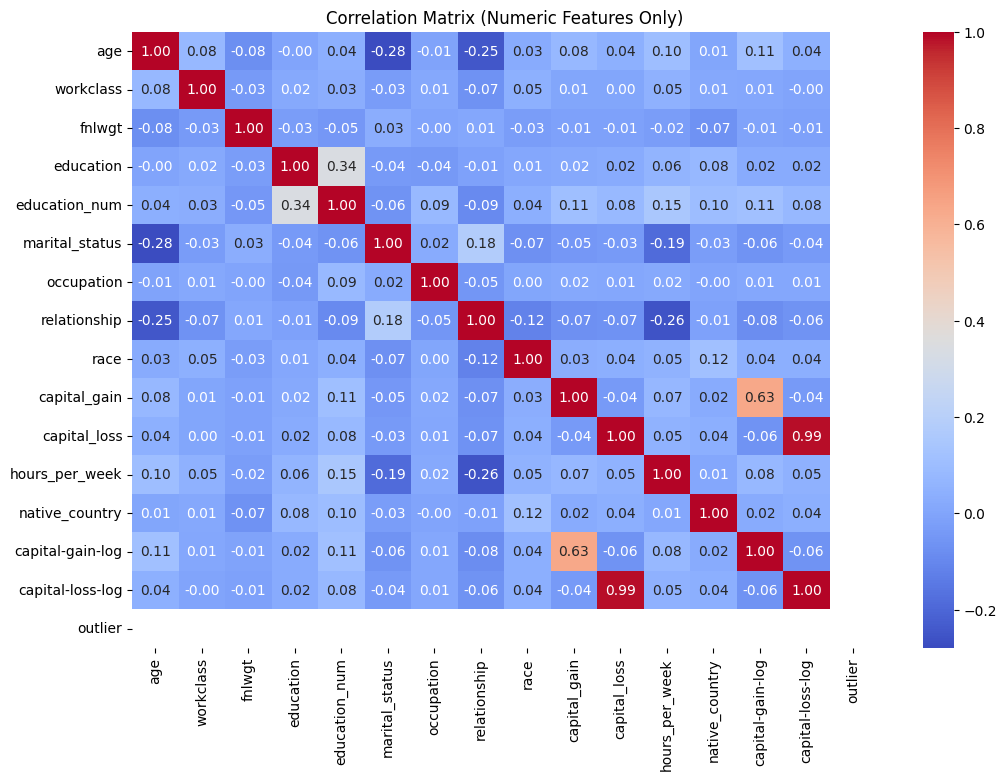

In [25]:
# Select only numeric columns for correlation
numeric_df = df_no_outliers.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix and plot
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


PPS detects nonlinear and asymmetric relationships, while correlation assumes linearity. For example, education has low correlation with income but high PPS score.